# Student grades prediction


Project Description


The dataset contains grades scored by students throughout their university tenure in various courses and their CGPA calculated based on their grades.


In [264]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [265]:
#reading the csv files and listing the datas
df_stu = pd.read_csv(r"C:\Users\Premium\Downloads\Grades.csv")
df_stu.head(5)

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


# Exploratory Data Analysis

In [266]:
df_stu.shape

(571, 43)

In [267]:
print('Total number of students:',len(df_stu))

Total number of students: 571


In [268]:
df_stu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

We can check there are some missing values.so we check for the count of null values.

In [269]:
df_stu.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [270]:
df_stu.isnull().sum().sum()
     

425

There are 425 null values.

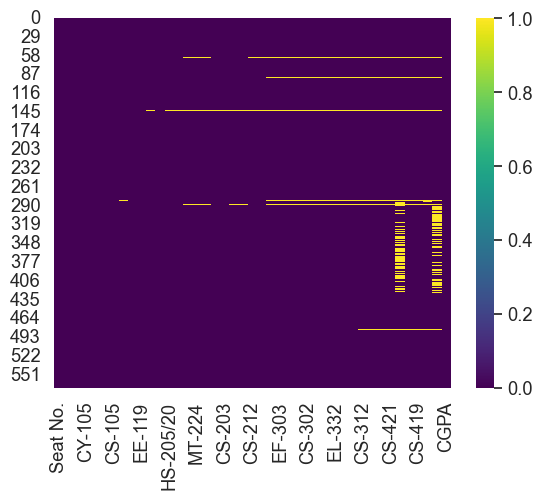

In [271]:
# Check  the null values using Heatmap

sns.heatmap(df_stu.isnull(), cmap='viridis')
plt.show()

In [272]:
df_stu.sample(5)

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
497,CS-97498,A,B,A,A-,A,A,B+,B+,A,...,A,A,A,B,A-,B+,A,B,B,3.583
398,CS-97399,C-,B,A,A-,A-,B-,B+,A,C-,...,A+,B,A-,B,NaN,A-,B,A,B,3.205
325,CS-97326,B,B+,A,A-,A,A,A-,A+,B,...,A+,B,B-,B+,B+,A,A-,B+,NaN,3.574
521,CS-97522,C-,D+,B-,C,B-,C,B,C-,B+,...,D,C-,A-,D+,F,C,B-,C-,D+,1.863
372,CS-97373,A-,B,A-,A,A,A-,A-,A+,B+,...,A+,A-,B,B,NaN,A,A-,A,A,3.707


In [273]:
df_stu['CGPA'].describe()

count    571.000000
mean       2.954888
std        0.620552
min        0.800000
25%        2.538000
50%        3.029000
75%        3.451000
max        3.985000
Name: CGPA, dtype: float64

Analysing the target variable(CGPA) the statistical analysis.

# Cleaning Data

In [274]:
df_stu.columns    # Dataset Columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

In [275]:

df_stu.replace(np.nan,0, inplace = True)
df_stu.head(10)

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
5,CS-97006,A,B-,B,D+,C+,A-,C+,B,B+,...,C,B-,C+,C+,A-,A-,B+,B-,B,3.026
6,CS-97007,B-,C-,A-,D,A-,B,A,B+,A-,...,B-,C,B+,B-,A,A-,B+,B+,A,2.957
7,CS-97008,B+,B+,C+,C,C,A-,C-,A-,B,...,D+,B+,B+,C,A,B+,A-,A-,A-,3.043
8,CS-97009,A-,C,A-,D+,B,A-,A-,A-,B+,...,B+,B,B-,C+,A,A-,B+,A-,A,3.358
9,CS-97010,A,B,C+,B,B,A-,C,B-,A-,...,C+,B-,B+,B-,A,A,A-,B,A,3.247


# Seperating Independent and target variables

In [276]:
##Seperating the input variable and target Variables.
input = df_stu.drop(["CS-403","CS-421","CS-406","CS-414","CS-419","CS-423","CS-412", 'MT-442',"Seat No.","CGPA"], axis=1)
target = df_stu[["CGPA"]]


In [277]:
target.head()
     

,CGPA
0,2.205
1,2.008
2,3.608
3,1.906
4,3.448


In [278]:
input.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,EF-303,HS-304,CS-301,CS-302,TC-383,EL-332,CS-318,CS-306,CS-312,CS-317
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C-,C+,B,C,C+,C,C-,C,C-,C-
1,A,D,D+,D,B-,C,D,A,D+,D,...,D,C-,A-,D+,C-,C,A-,D,D+,D
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,C+,A,B+,A-,B,B+,A-,A-,B,B
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,D,B-,D,B-,D+,D+,B+,C-,D+,C
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,C-,A-,B-,A-,C+,A-,B-,A-,B-,B+


# Label Encoding

#The Grades in the dataset are present in string format, we are converting it in intger format for further to use in models.

In [279]:
pd.unique(df_stu["PH-121"])

array(['B-', 'A', 'D', 'A-', 'B+', 'B', 'C+', 'C', 'C-', 'D+', 'WU', 'A+',
       'F'], dtype=object)

In [280]:
grades_en = {'B-':2.7, 'A':4, 'D':1.0, 'A-':3.7, 'B+':3.4, 'B':3.0, 'C+':2.4, 'C':2.0, 'C-':1.7, 'D+':1.4, 'WU':0.0, 'A+':4.3,'F':0.5}

In [281]:

type(input)

pandas.core.frame.DataFrame

In [282]:
for item in input:
      input[item] = input[item].replace(grades_en)

input.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,EF-303,HS-304,CS-301,CS-302,TC-383,EL-332,CS-318,CS-306,CS-312,CS-317
0,2.7,1.4,1.7,2.0,1.7,1.4,1.0,1.7,2.7,1.7,...,1.7,2.4,3.0,2.0,2.4,2.0,1.7,2.0,1.7,1.7
1,4.0,1.0,1.4,1.0,2.7,2.0,1.0,4.0,1.4,1.0,...,1.0,1.7,3.7,1.4,1.7,2.0,3.7,1.0,1.4,1.0
2,4.0,3.0,4.0,2.7,3.4,4.0,2.7,3.4,3.7,3.7,...,2.4,4,3.4,3.7,3.0,3.4,3.7,3.7,3.0,3.0
3,1.0,2.4,1.4,1.0,1.0,3.7,1.4,1.7,1.0,2.4,...,1.0,2.7,1.0,2.7,1.4,1.4,3.4,1.7,1.4,2.0
4,3.7,3.7,3.7,3.4,4.0,4.0,3.7,3.4,4.0,3.7,...,1.7,3.7,2.7,3.7,2.4,3.7,2.7,3.7,2.7,3.4


In [283]:

# Concating inputs and targets 
df = pd.concat([input, target], axis=1)

In [199]:
df.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,HS-304,CS-301,CS-302,TC-383,EL-332,CS-318,CS-306,CS-312,CS-317,CGPA
0,2.7,1.4,1.7,2.0,1.7,1.4,1.0,1.7,2.7,1.7,...,2.4,3.0,2.0,2.4,2.0,1.7,2.0,1.7,1.7,2.205
1,4.0,1.0,1.4,1.0,2.7,2.0,1.0,4.0,1.4,1.0,...,1.7,3.7,1.4,1.7,2.0,3.7,1.0,1.4,1.0,2.008
2,4.0,3.0,4.0,2.7,3.4,4.0,2.7,3.4,3.7,3.7,...,4,3.4,3.7,3.0,3.4,3.7,3.7,3.0,3.0,3.608
3,1.0,2.4,1.4,1.0,1.0,3.7,1.4,1.7,1.0,2.4,...,2.7,1.0,2.7,1.4,1.4,3.4,1.7,1.4,2.0,1.906
4,3.7,3.7,3.7,3.4,4.0,4.0,3.7,3.4,4.0,3.7,...,3.7,2.7,3.7,2.4,3.7,2.7,3.7,2.7,3.4,3.448


# Data Visualization

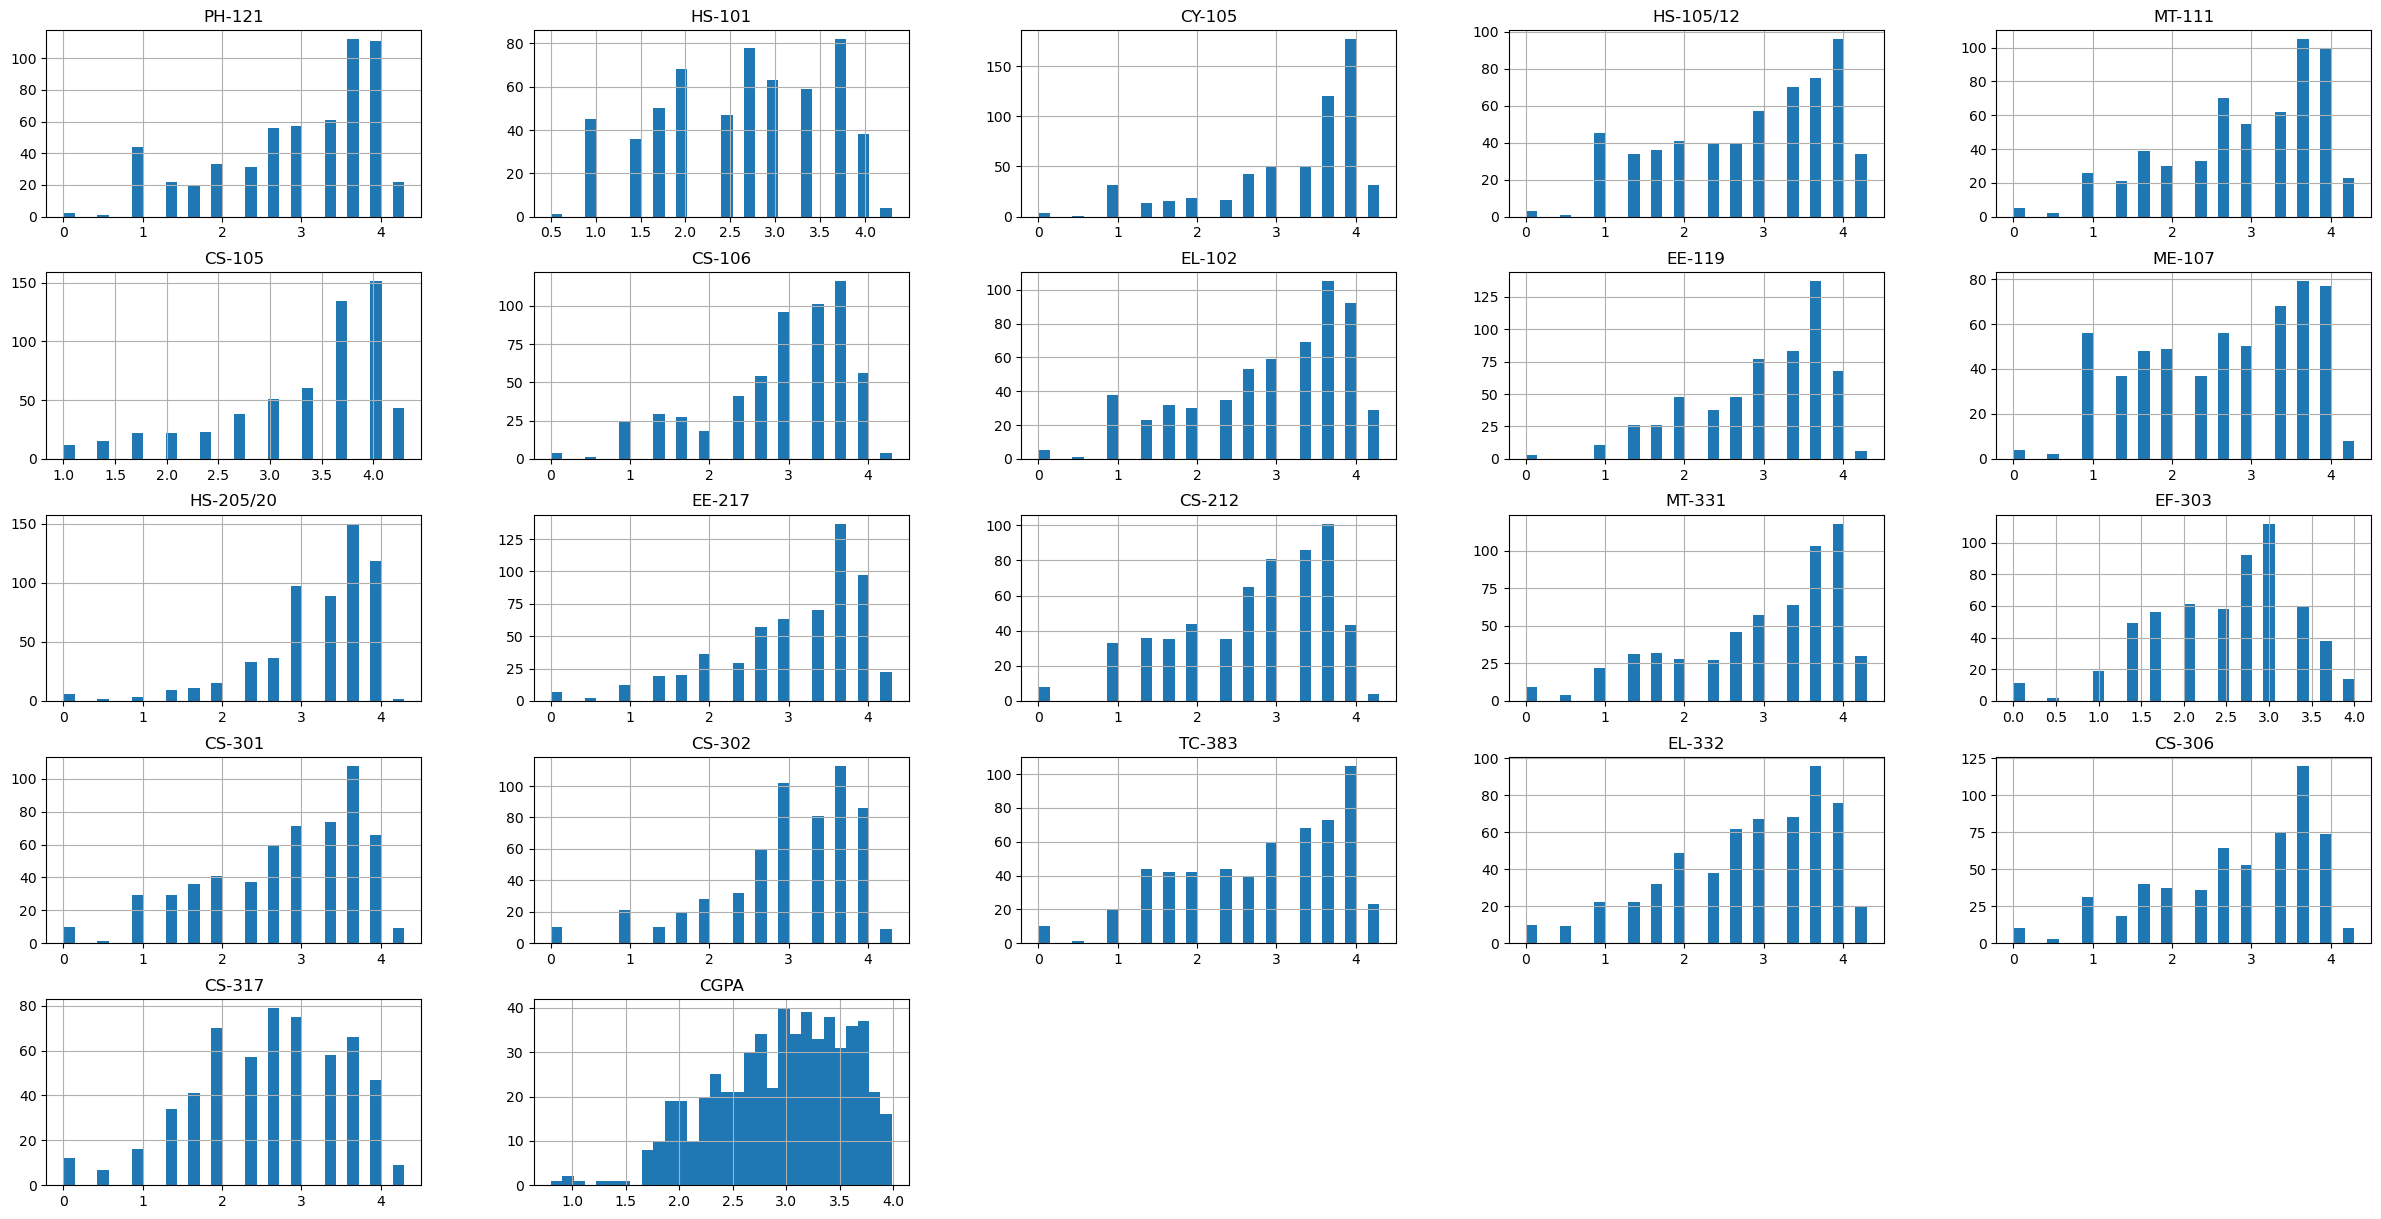

In [32]:
df.hist(bins=30,figsize=(30,15))
plt.show()
     

# Data Correlation

<AxesSubplot:>

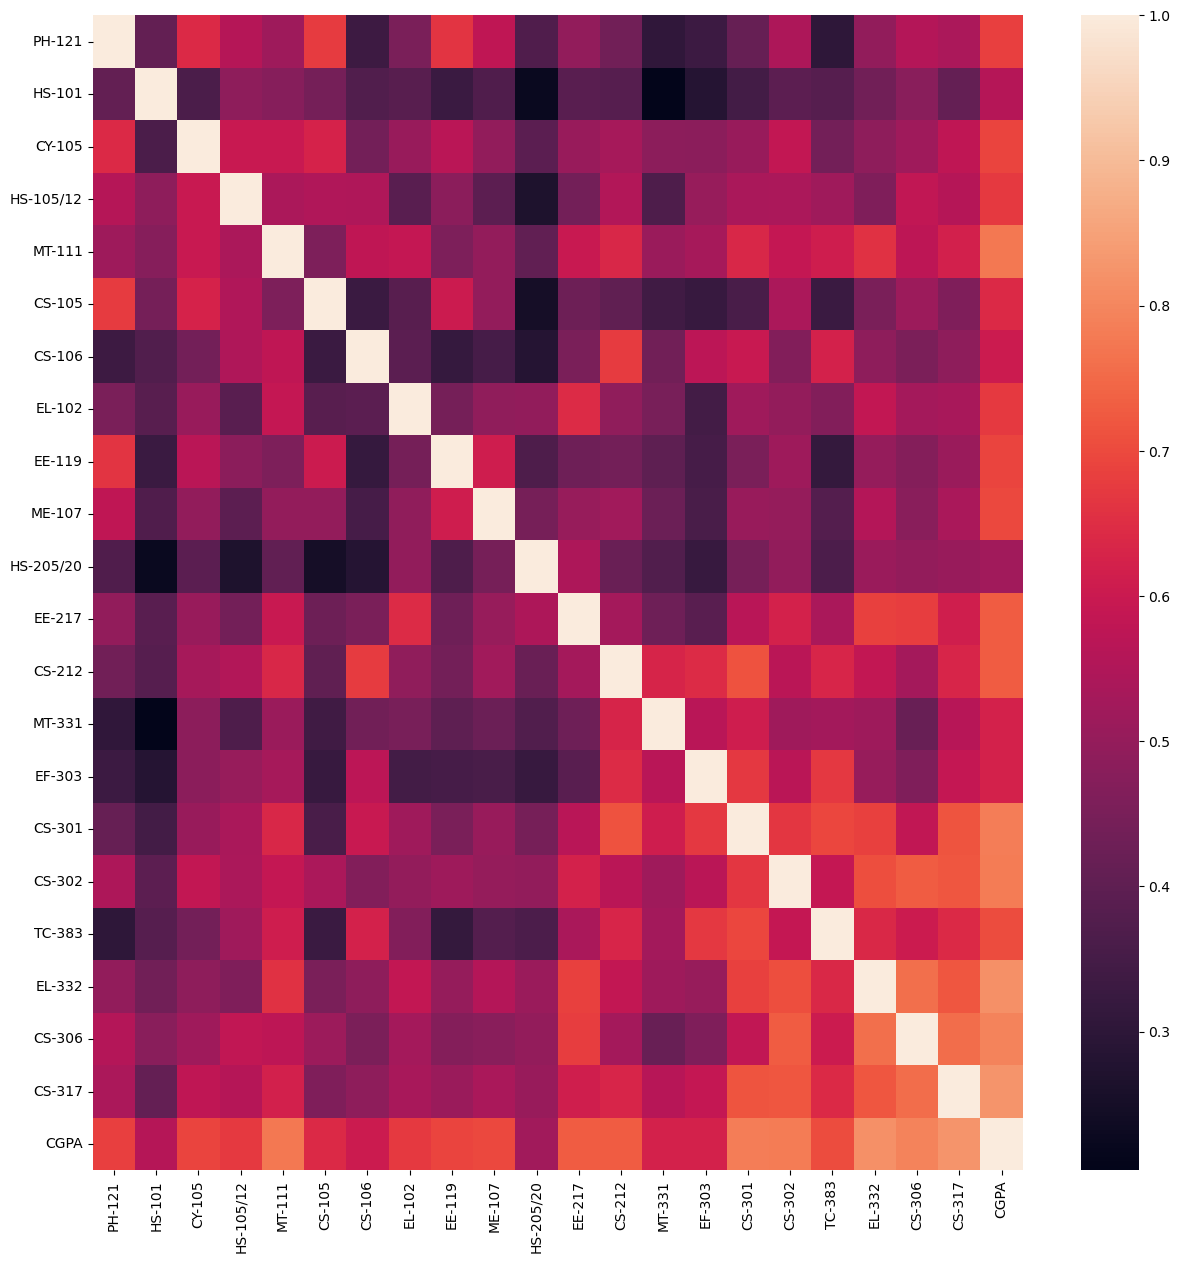

In [33]:
# Looking for correlations
plt.figure(figsize=(15,15))
sns.heatmap(df.corr())

In [284]:
## Find correlations with the GradeCGPA
most_correlated = df.corr().abs()['CGPA'].sort_values(ascending=False)

# Maintain the top 8 most correlation features with CGPA
most_correlated = most_correlated[:9]
most_correlated

CGPA      1.000000
CS-317    0.825386
EL-332    0.818192
CS-306    0.793389
CS-301    0.784635
CS-302    0.780986
MT-111    0.774758
CS-212    0.728127
EE-217    0.727453
Name: CGPA, dtype: float64

In [285]:
df.describe()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-212,MT-331,EF-303,CS-301,CS-302,TC-383,EL-332,CS-306,CS-317,CGPA
count,571.000000,571.000000,571.00000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,...,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000
mean,3.030823,2.631349,3.27986,2.897723,3.001926,3.351839,2.964974,2.985989,3.023292,2.704553,...,2.782312,3.042907,2.498424,2.856392,3.054816,2.886690,2.882137,2.900000,2.661996,2.954888
std,0.982440,0.909626,0.94544,1.038899,0.963899,0.822411,0.869361,0.997337,0.843697,1.031068,...,0.940055,1.023975,0.833665,0.974449,0.883031,1.029818,1.002364,0.989542,0.944332,0.620552
min,0.000000,0.500000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000
25%,2.400000,2.000000,2.70000,2.000000,2.400000,3.000000,2.400000,2.400000,2.400000,1.700000,...,2.000000,2.400000,2.000000,2.000000,2.700000,2.000000,2.000000,2.400000,2.000000,2.538000
50%,3.400000,2.700000,3.70000,3.000000,3.400000,3.700000,3.000000,3.400000,3.400000,2.700000,...,3.000000,3.400000,2.700000,3.000000,3.400000,3.000000,3.000000,3.000000,2.700000,3.029000
75%,3.700000,3.400000,4.00000,3.700000,3.700000,4.000000,3.700000,3.700000,3.700000,3.700000,...,3.700000,4.000000,3.000000,3.700000,3.700000,3.700000,3.700000,3.700000,3.400000,3.451000
max,4.300000,4.300000,4.30000,4.300000,4.300000,4.300000,4.300000,4.300000,4.300000,4.300000,...,4.300000,4.300000,4.000000,4.300000,4.300000,4.300000,4.300000,4.300000,4.300000,3.985000


# Modeling the datas.Linear Regression

In [318]:
# Standard ML Models for comparison
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor

# Splitting data into training/testing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error

# Distributions
import scipy

In [335]:
# splitting the data into training and testing data (75% and 25%)
# we mention the random state to achieve the same split everytime we run the code
X_train, X_test, y_train, y_test = train_test_split(df, df['CGPA'], test_size = 0.25, random_state=42)


In [326]:
X_train.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,HS-304,CS-301,CS-302,TC-383,EL-332,CS-318,CS-306,CS-312,CS-317,CGPA
290,3.0,2.0,3.0,2.4,3.4,3.0,3.0,3.4,3.4,3.0,...,2.0,3.4,3.0,3.0,3.7,2.0,3.0,4.3,3.0,3.071
144,4.3,3.7,4.0,4.3,4.0,4.0,4.0,3.7,4.0,3.7,...,3.0,4.0,4.0,4.3,4.0,4,4.0,3.7,4.0,3.906
514,3.0,1.0,3.4,3.7,2.7,3.4,3.0,1.0,3.4,1.0,...,3.0,3.7,3.7,3.0,4.0,2.7,3.0,4,3.0,3.027
245,3.0,2.7,3.7,2.0,3.4,4.0,2.7,2.4,2.7,2.0,...,3.4,2.0,3.0,2.0,3.0,2.4,2.7,1.7,2.0,2.605
487,3.0,2.0,4.0,3.4,2.7,4.0,3.0,2.7,3.4,2.7,...,2.7,3.4,3.0,3.4,3.0,2.0,2.4,3.4,3.0,3.114


In [327]:
y_train

290    3.071
144    3.906
514    3.027
245    2.605
487    3.114
       ...  
71     2.805
106    1.845
270    3.555
435    3.559
102    3.176
Name: CGPA, Length: 428, dtype: float64

In [323]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [324]:
from sklearn.model_selection import train_test_split

In [328]:
X_test.shape

(143, 34)

In [329]:
X_train.shape

(428, 34)

In [330]:
y_train.shape

(428,)

In [331]:
y_test.shape

(143,)

# MAE - Mean Absolute Error & RMSE - Root Mean Square Error

In [257]:
# Calculate mae and rmse
def evaluate_predictions(predictions, true):
    mae = np.mean(abs(predictions - true))
    rmse = np.sqrt(np.mean((predictions - true) ** 2))

    return mae, rmse


In [258]:
# find the median
median_pred = X_train['CGPA'].median()

# create a list with all values as median
median_preds = [median_pred for _ in range(len(X_test))]

# store the true cgpa values for passing into the function
true = X_test['CGPA']



In [259]:
# Display the naive baseline metrics
mb_mae, mb_rmse = evaluate_predictions(median_preds, true)
print('Median Baseline  MAE: {:.4f}'.format(mb_mae))
print('Median Baseline RMSE: {:.4f}'.format(mb_rmse))


Median Baseline  MAE: 0.4825
Median Baseline RMSE: 0.5722


In [287]:
# Evaluate several ml models by training on training set and testing on testing set
def evaluate(X_train, X_test, y_train, y_test):
    # Names of models
    model_name_list = ['Linear Regression', 'ElasticNet Regression',
                      'Random Forest', 'Extra Trees', 'SVM',
                       'Gradient Boosted', 'Baseline']
    X_train = X_train.drop('CGPA', axis='columns')
    X_test = X_test.drop('CGPA', axis='columns')
    
    # Instantiate the models
    model1 = LinearRegression()
    model2 = ElasticNet(alpha=1.0, l1_ratio=0.5)
    model3 = RandomForestRegressor(n_estimators=100)
    model4 = ExtraTreesRegressor(n_estimators=100)
    model5 = SVR(kernel='rbf', degree=3, C=1.0, gamma='auto')
    model6 = GradientBoostingRegressor(n_estimators=50)
    
    # Dataframe for results
    results = pd.DataFrame(columns=['mae', 'rmse'], index = model_name_list)
    
    # Train and predict with each model
    for i, model in enumerate([model1, model2, model3, model4, model5, model6]):
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        
        # Metrics
        mae = np.mean(abs(predictions - y_test))
        rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
        
        # Insert results into the dataframe
        model_name = model_name_list[i]
        results.loc[model_name, :] = [mae, rmse]
    
    # Median Value Baseline Metrics
    baseline = np.median(y_train)
    baseline_mae = np.mean(abs(baseline - y_test))
    baseline_rmse = np.sqrt(np.mean((baseline - y_test) ** 2))
    
    results.loc['Baseline', :] = [baseline_mae, baseline_rmse]
    
    return results

In [288]:
results = evaluate(X_train, X_test, y_train, y_test)
results

ValueError: could not convert string to float: 'W'

In [235]:
# Build a Model

from sklearn import linear_model

# Bulid a new Model
lr_1 = linear_model.LinearRegression()


In [160]:
input_lr=[]
input_lr.append([4, 3.0, 0, 0, 0, 1.0, 4, 2.0, 0, 4, 4])
print(input_lr )
print(lr_1.predict(input_lr ))

[[4, 3.0, 0, 0, 0, 1.0, 4, 2.0, 0, 4, 4]]
[1.8874763]
